In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
import seaborn as sns
from seaborn import plt
from datetime import datetime
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',60)

import statsmodels.api as sm
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

%matplotlib inline

import scipy.stats as stats
import statsmodels.formula.api as smf

In [24]:
magic_data = pd.read_csv("final_magic_data.csv")
magic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9427 entries, 0 to 9426
Data columns (total 58 columns):
deck_rank             9427 non-null int64
top_two               9427 non-null int64
blue                  9427 non-null int64
red                   9427 non-null int64
green                 9427 non-null int64
white                 9427 non-null int64
black                 9427 non-null int64
Rainbow               9427 non-null int64
Ad_Nauseam            9427 non-null int64
Affinity              9427 non-null int64
Aura_Hexproof         9427 non-null int64
BUG                   9427 non-null int64
Bant                  9427 non-null int64
Birthing_Pod          9427 non-null int64
Bloom_Titan           9427 non-null int64
Blue_Moon             9427 non-null int64
Boremandos            9427 non-null int64
Boros                 9427 non-null int64
Delverless_RUG        9427 non-null int64
Dredgevine            9427 non-null int64
Elemental_Combo       9427 non-null int64
Faeries    

###Step 1: Explore the dataset and display some visualizations showing how the variables relate to each other


In [3]:
magic_data.describe()

,top_two,blue,red,green,white,black,Rainbow,Ad_Nauseam,Affinity,Aura_Hexproof,BUG,Bant,Birthing_Pod,Bloom_Titan,Blue_Moon,Boremandos,Boros,Delverless_RUG,Dredgevine,Elemental_Combo,Faeries,Genesis_Wave,Gift_Control,Gruul_Aggro,Hatebear,Hive_Mind,Infect,Instant_Reanimator,Jeskai_Ascendancy,Jund,Junk,Living_End,Loam,Martyr_Life,Merfolk,Mono_Black_Control,Orzhov_Midrange,Other_Aggro,Other_Combo,Other_Control,RUG_Aggro,Red_Deck_Wins,Scapeshift,Scepter,Sunny_Side_Up,Teaching_Control,The_Rock,Tokens,Twin_Exarch,UB_Delver,UR_Aggro,UR_Storm,UW_Control,UWx_Midrange,UrzaTron,Valakut,Zoo
count,9427.000000,9427.000000,9427.000000,9427.000000,9427.000000,9427.000000,9427.000000,9427.000000,9427.000000,9427.000000,9427.000000,9427.000000,9427.000000,9427.000000,9427.000000,9427.000000,9427.000000,9427.000000,9427.000000,9427.000000,9427.000000,9427.000000,9427.000000,9427.000000,9427.000000,9427.000000,9427.000000,9427.000000,9427.000000,9427.000000,9427.000000,9427.000000,9427.000000,9427.000000,9427.000000,9427.000000,9427.000000,9427.000000,9427.000000,9427.000000,9427.000000,9427.000000,9427.000000,9427.000000,9427.000000,9427.000000,9427.000000,9427.000000,9427.000000,9427.00000,9427.000000,9427.000000,9427.000000,9427.000000,9427.000000,9427.000000,9427.000000
mean,0.392065,0.686963,0.651215,0.514374,0.390474,0.288003,0.020261,0.028959,0.305187,0.050493,0.006046,0.015063,0.350483,0.045402,0.014321,0.027580,0.011244,0.006895,0.011669,0.002546,0.050493,0.007107,0.042962,0.020367,0.069587,0.007532,0.066511,0.010502,0.005834,0.302641,0.108412,0.037870,0.018033,0.053676,0.088257,0.014639,0.010396,0.023868,0.021640,0.038931,0.044341,0.166119,0.133871,0.011456,0.015063,0.006046,0.080407,0.026520,0.314310,0.01082,0.098441,0.106290,0.084332,0.177257,0.190835,0.004349,0.063011
std,0.488237,0.463754,0.476611,0.499820,0.487883,0.452856,0.309536,0.365772,1.124868,0.485518,0.169451,0.277882,1.232301,0.466416,0.280013,0.345446,0.206208,0.159750,0.230019,0.102968,0.492676,0.166249,0.447972,0.300309,0.566812,0.193920,0.562392,0.207529,0.145911,1.115805,0.710415,0.413218,0.287835,0.486486,0.629949,0.280942,0.227296,0.299874,0.316728,0.423016,0.444867,0.882550,0.781378,0.220613,0.262571,0.153693,0.615336,0.330783,1.171742,0.20102,0.669312,0.708493,0.613515,0.885726,0.921240,0.128160,0.520386
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

In [4]:
magic_data.head()

,top_two,blue,red,green,white,black,Rainbow,Ad_Nauseam,Affinity,Aura_Hexproof,BUG,Bant,Birthing_Pod,Bloom_Titan,Blue_Moon,Boremandos,Boros,Delverless_RUG,Dredgevine,Elemental_Combo,Faeries,Genesis_Wave,Gift_Control,Gruul_Aggro,Hatebear,Hive_Mind,Infect,Instant_Reanimator,Jeskai_Ascendancy,Jund,Junk,Living_End,Loam,Martyr_Life,Merfolk,Mono_Black_Control,Orzhov_Midrange,Other_Aggro,Other_Combo,Other_Control,RUG_Aggro,Red_Deck_Wins,Scapeshift,Scepter,Sunny_Side_Up,Teaching_Control,The_Rock,Tokens,Twin_Exarch,UB_Delver,UR_Aggro,UR_Storm,UW_Control,UWx_Midrange,UrzaTron,Valakut,Zoo
0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [26]:
magic_data.columns

Index([u'blue', u'red', u'green', u'white', u'black', u'top_four', u'top_two', u'Rainbow', u'Ad_Nauseam', u'Affinity', u'Aura_Hexproof', u'BUG', u'Bant', u'Birthing_Pod', u'Bloom_Titan', u'Blue_Moon', u'Boremandos', u'Boros', u'Delverless_RUG', u'Dredgevine', u'Elemental_Combo', u'Faeries', u'Genesis_Wave', u'Gift_Control', u'Gruul_Aggro', u'Hatebear', u'Hive_Mind', u'Infect', u'Instant_Reanimator', u'Jeskai_Ascendancy', u'Jund', u'Junk', u'Living_End', u'Loam', u'Martyr_Life', u'Merfolk', u'Mono_Black_Control', u'Orzhov_Midrange', u'Other_Aggro', u'Other_Combo', u'Other_Control', u'RUG_Aggro', u'Red_Deck_Wins', u'Scapeshift', u'Scepter', u'Sunny_Side_Up', u'Teaching_Control', u'The_Rock', u'Tokens', u'Twin_Exarch', u'UB_Delver', u'UR_Aggro', u'UR_Storm', u'UW_Control', u'UWx_Midrange', u'UrzaTron', u'Valakut', u'Zoo'], dtype='object')

###Step2: Build a simple logistic regression and visualize it


In [28]:
model = smf.ols('top_two ~ blue + red + green + white + black', data=magic_data)
fitted = model.fit()
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                top_two   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.016
Date:                Tue, 24 Mar 2015   Prob (F-statistic):              0.406
Time:                        18:18:41   Log-Likelihood:                -6614.6
No. Observations:                9427   AIC:                         1.324e+04
Df Residuals:                    9421   BIC:                         1.328e+04
Df Model:                           5                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.3610      0.017     21.640      0.000         0.328     0.394
blue           0.0093      0.013      0.731      0.465        -0.016     0.034
red            0.0229      0.011      2.009      0.045         0.001     0.045
green          0.0043      0.011      0.397      0.691        -0.017     0.026
white          0.0113      0.011      1.007      0.314        -0.011     0.033
black          0.0107      0.013      0.814      0.416        -0.015     0.036
==============================================================================
Omnibus:                      281.209   Durbin-Watson:                   0.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1582.927
Skew:                           0.442   Prob(JB):                         0.00
Kurtosis:                       1.197   Cond. No.                         6.84
==============================================================================
"""

### Step 3: Use train-test spit to split your data at a 30% mark and run another logistic regression using all variables

In [26]:
X = magic_data[[u'blue', u'red', u'green', u'white', u'black']]

y = magic_data['top_two']

In [27]:
# instantiate a logistic regression model, and fit with X and y
mod = LogisticRegression()
mod = mod.fit(X, y)

# check the accuracy on the training set
mod.score(X, y)

0.2088681446907818

In [9]:
# examine the coefficients
pd.DataFrame(zip(X.columns, np.transpose(mod.coef_)))

,0,1
0,blue,[0.0371907009142]
1,red,[0.0949485241018]
2,green,[0.0173250632732]
3,white,[0.0463232656831]
4,black,[0.0436697996304]


In [10]:
# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)
mod2 = LogisticRegression()
mod2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, penalty='l2', random_state=None, tol=0.0001)

In [11]:
# predict class labels for the test set
predicted = mod2.predict(X_test)
print predicted

[0 0 0 ..., 0 0 0]


In [12]:
# generate class probabilities
probs = mod2.predict_proba(X_test)
print probs

[[ 0.62222643  0.37777357]
 [ 0.61145812  0.38854188]
 [ 0.61266678  0.38733322]
 ..., 
 [ 0.60116194  0.39883806]
 [ 0.61324254  0.38675746]
 [ 0.61145812  0.38854188]]


In [13]:
# generate evaluation metrics
print metrics.accuracy_score(y_test, predicted)
print metrics.roc_auc_score(y_test, probs[:, 1])

0.599858607282
0.505246735561


###Step 4: Apply Crossvalidation to see how the model fares across different splits of your date

#### Use crossvalidation to score model

In [14]:
# evaluate the model using 10-fold cross-validation
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print scores
print scores.mean()

[ 0.60805085  0.60763521  0.60763521  0.60763521  0.60763521  0.60763521
  0.60828025  0.60828025  0.60828025  0.60828025]
0.60793479005


### Step 5: Evaluate Feature Importance

In [15]:
logit = smf.Logit(y, X)

In [16]:
results=logit.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.672908
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                top_two   No. Observations:                 9427
Model:                          Logit   Df Residuals:                     9422
Method:                           MLE   Df Model:                            4
Date:                Tue, 24 Mar 2015   Pseudo R-squ.:               -0.004846
Time:                        15:30:17   Log-Likelihood:                -6343.5
converged:                       True   LL-Null:                       -6312.9
                                        LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
blue          -0.2593      0.038     -6.736      0.000        -0.335    -0.184
red           -0.1172      0.040     -2.942      0.003        -0.195    -0.039
green         -0.0985      0.043     -2.283      0.022        -0.183    -0.014
white         -0.0947      0.044     -2.175      0.030        -0.180    -0.009
black         -0.1613      0.049     -3.288      0.001        -0.257    -0.065
==============================================================================
"""

### Exercise 7: Plot the ROC Curve for the logistic regression you chose

In [17]:
def plot_roc_curve(y_test, probs, categories):
    from sklearn.metrics import roc_curve
    from sklearn.metrics import auc
    
    for pos_label, category in enumerate(categories):
        fpr, tpr, thresholds = roc_curve(y_test, probs[:, pos_label], pos_label)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label='{} ROC curve (area = {:.3f})'.format(category, roc_auc))
    
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")

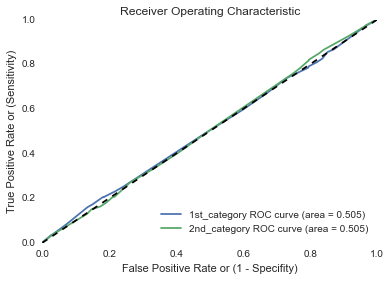

In [18]:
categories = [ '1st_category', '2nd_category']

plot_roc_curve(y_test, probs, categories)

In [19]:
# predict class labels for the test set
predicted = mod2.predict(X_test)
print predicted

[0 0 0 ..., 0 0 0]


In [20]:
# generate class probabilities
probs = mod2.predict_proba(X_test)
print probs

[[ 0.62222643  0.37777357]
 [ 0.61145812  0.38854188]
 [ 0.61266678  0.38733322]
 ..., 
 [ 0.60116194  0.39883806]
 [ 0.61324254  0.38675746]
 [ 0.61145812  0.38854188]]


In [21]:
probs[1]

array([ 0.61145812,  0.38854188])

###Findings